# Realised Volatility - Stylised Facts

---

## Clustering and persistence

One of the most striking features of realized volatility is volatility clustering: periods of high volatility tend to be followed by more high volatility, and tranquil periods tend to persist as well. This shows up as very slow decay in the autocorrelation function of realized variance or log realized variance; significant autocorrelations can persist over tens or even hundreds of lags, which is often described as “long memory” in volatility.

From a modelling perspective, this persistence motivates using dynamic structures that incorporate multiple horizons rather than a simple short-memory AR(1) on variance. Multi-scale models like HAR-RV, which include daily, weekly, and monthly realized volatility components, are explicitly designed to approximate this long-memory behaviour in a parsimonious linear form.



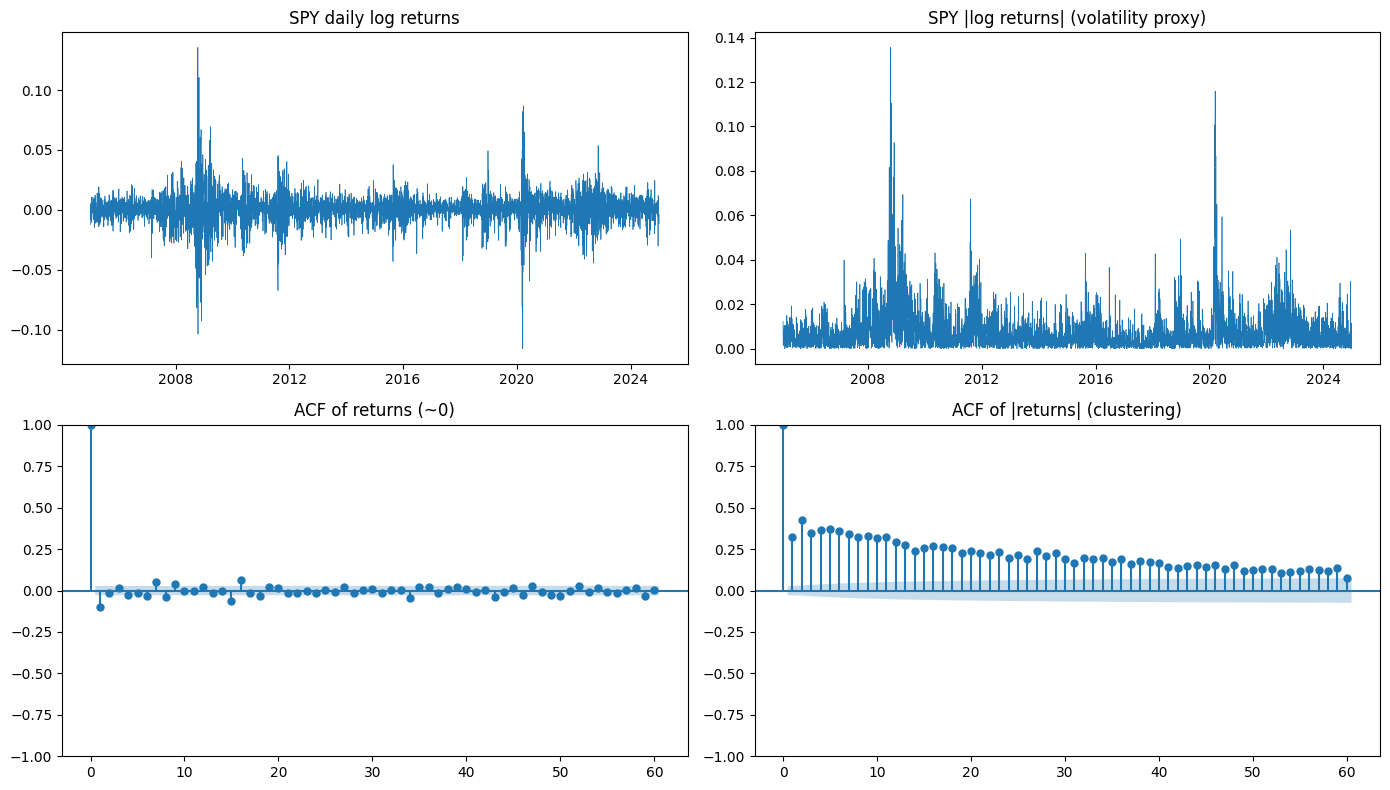

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf

# 1) Download SPY daily data
data = yf.download(
    "SPY",
    start="2005-01-01",
    end="2025-01-01",
    interval="1d",
    auto_adjust=True,
    progress=False,
)

# 2) Log returns (Series)
close = data["Close"].astype(float)        # Series
ret = np.log(close).diff().dropna()       # Series of returns

# 3) Volatility proxy: absolute returns (Series)
abs_ret = ret.abs()

# 4) Plots: returns vs |returns| and their ACFs
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Top left: raw returns
axes[0, 0].plot(ret.index, ret, lw=0.5)
axes[0, 0].set_title("SPY daily log returns")

# Top right: |returns| as volatility proxy
axes[0, 1].plot(abs_ret.index, abs_ret, lw=0.5)
axes[0, 1].set_title("SPY |log returns| (volatility proxy)")

# Bottom left: ACF of returns (should be ~0)
plot_acf(ret.values, lags=60, ax=axes[1, 0])
axes[1, 0].set_title("ACF of returns (~0)")

# Bottom right: ACF of |returns| (shows clustering)
plot_acf(abs_ret.values, lags=60, ax=axes[1, 1])
axes[1, 1].set_title("ACF of |returns| (clustering)")

plt.tight_layout()
plt.show()


## Distributional stylized facts

Daily equity returns exhibit several **distributional** stylized facts that deviate sharply from the Gaussian benchmark. [web:126][web:129]

- **Heavy tails (leptokurtosis).** The unconditional return distribution has fatter tails and a more peaked center than a normal, implying extreme moves occur far more frequently than Gaussian models predict.  
- **Gain/loss asymmetry.** Returns are not perfectly symmetric; equity indices in particular tend to show negative skewness, with large drawdowns more common than equally large upward jumps. 
- **Scale dependence.** As the sampling horizon increases, aggregated returns become more Gaussian but much more slowly than for an iid normal process, reflecting persistence of heavy tails across time scales. 


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use("seaborn-v0_8")

# ---------------------------------------------------------------------
# Load data once
# ---------------------------------------------------------------------
data = yf.download(
    "SPY",
    start="2005-01-01",
    end="2025-01-01",
    interval="1d",
    auto_adjust=True,
    progress=False,
)
close = data["Close"].astype(float)
ret = np.log(close).diff().dropna()          # daily log returns
abs_ret = ret.abs()
ret2 = ret**2


ValueError: Cannot calculate a linear regression if all x values are identical

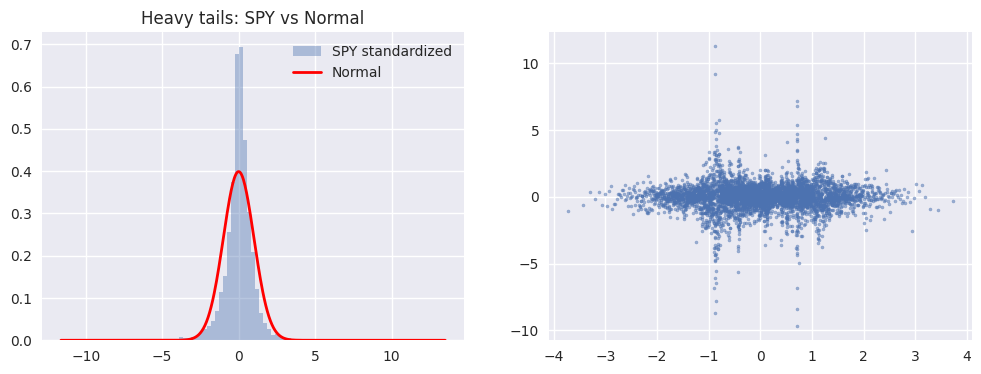

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# z: standardized returns Series
z_arr = z.to_numpy()
z_sorted = np.sort(z_arr)
n = len(z_sorted)

# Theoretical normal quantiles
p = (np.arange(1, n + 1) - 0.5) / n
q_theor = stats.norm.ppf(p)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1) Histogram vs Normal
x = np.linspace(z_arr.min() * 1.2, z_arr.max() * 1.2, 500)
axes[0].hist(z_arr, bins=80, density=True, alpha=0.4, label="SPY standardized")
axes[0].plot(x, stats.norm.pdf(x), "r", lw=2, label="Normal")
axes[0].set_title("Heavy tails: SPY vs Normal")
axes[0].legend()

# 2) QQ-plot without probplot
axes[1].scatter(q_theor, z_sorted, s=5, alpha=0.5)
# add reference line using robust fit
slope, intercept, *_ = stats.linregress(q_theor, z_sorted)
xline = np.linspace(q_theor.min(), q_theor.max(), 100)
axes[1].plot(xline, intercept + slope * xline, "r", lw=2)
axes[1].set_xlabel("Theoretical normal quantiles")
axes[1].set_ylabel("SPY quantiles")
axes[1].set_title("QQ-plot: SPY vs Normal (manual)")

plt.tight_layout()
plt.show()
